In [ ]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('children_anemia.csv')
df.head()

,Age in 5-year groups,Type of place of residence,Highest educational level,Wealth index combined,Births in last five years,Age of respondent at 1st birth,Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal),Anemia level,Have mosquito bed net for sleeping (from household questionnaire),Smokes cigarettes,Current marital status,Currently residing with husband/partner,When child put to breast,Had fever in last two weeks,Hemoglobin level adjusted for altitude (g/dl - 1 decimal),Anemia level.1,"Taking iron pills, sprinkles or syrup"
0,40-44,Urban,Higher,Richest,1,22,NaN,NaN,Yes,No,Living with partner,Staying elsewhere,Immediately,No,NaN,NaN,Yes
1,35-39,Urban,Higher,Richest,1,28,NaN,NaN,Yes,No,Married,Living with her,Hours: 1,No,NaN,NaN,No
2,25-29,Urban,Higher,Richest,1,26,NaN,NaN,No,No,Married,Living with her,Immediately,No,NaN,NaN,No
3,25-29,Urban,Secondary,Richest,1,25,95.0,Moderate,Yes,No,Married,Living with her,105.0,No,114.0,Not anemic,No
4,20-24,Urban,Secondary,Richest,1,21,NaN,NaN,Yes,No,No longer living together/separated,NaN,Immediately,No,NaN,NaN,No


#1.Data Cleaning :

The dataset is loaded from a CSV file, and age ranges are converted to numerical
values by taking the mean of the range. Categorical data, such as the time a
child was put on the breast, is encoded to numerical values. Missing values in
numerical columns are filled with the mean, while missing values in categorical
columns are filled with the mode. Forward and backward fill methods are also
applied to handle missing data. Duplicate rows are removed to ensure unique
observations, and outliers in numerical columns are detected and removed using
the Interquartile Range (IQR) method.

In [ ]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('children_anemia.csv')

print("\033[1m\033[97m 1. Data Cleaning:\033[0m")


# Converting the age range (e.g., 23-34) into a numerical value (mean of the range)
def convert_age_range(age_range):
    if pd.isna(age_range):
        return np.nan
    age_range = age_range.split('-')
    if len(age_range) == 2:
        return (int(age_range[0]) + int(age_range[1])) / 2
    else:
        return np.nan
# Apply the conversion function to the 'Age in 5-year groups' column
df['Age in 5-year groups'] = df['Age in 5-year groups'].apply(convert_age_range)



# data that should be converted from numerical data to catagorical data
data = {'time_put_on_breast': ['immediately', 'within 1 hour', '1-3 hours', 'more than 3 hours']}
df = pd.DataFrame(data)
# Encoding categorical data
df['time_put_on_breast_encoded'] = df['time_put_on_breast'].astype('category').cat.codes
print(df)

### Handle missing values

# For numerical columns, fill missing values with mean
for column in df.select_dtypes(include=[np.number]).columns:
    df[column].fillna(df[column].mean(), inplace=True)

# For categorical columns, fill missing values with mode
for column in df.select_dtypes(include=[object]).columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

# Forward fill method
df_ffill = df.fillna(method='ffill')

# Backward fill method
df_bfill = df.fillna(method='bfill')

### Removing Duplicate Entries

# We typically delete duplicate rows because they represent repeated observations,
# While duplicate columns are rare and usually indicate a data preprocessing error
# Removing duplicate rows

df.drop_duplicates(inplace=True)


### Detecting and Removing Outliers

# Select numerical columns (including the converted 'Age in 5-year groups')
numerical_columns = df.select_dtypes(include=[np.number]).columns

# Detect and remove outliers using the IQR method for numerical columns
for column in numerical_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]



print("\n\033[1m\033[97mFirst few rows of the cleaned dataset:\033[0m")
print(df.head())

print("\n\033[1m\033[97mMissing values per column after cleaning:\033[0m")
print(df.isnull().sum())

print("\n\033[1m\033[97m\nMissing values handled using forward fill method:\033[0m")
print(df_ffill.isnull().sum())

print("\n\033[1m\033[97m\nMissing values handled using backward fill method:\033[0m")
print(df_bfill.isnull().sum())

print("\n\033[1m\033[97mNumber of duplicate rows after cleaning:\033[0m")
print(df.duplicated().sum())

print("\n\033[1m\033[97mStatistics after removing outliers:\033[0m")
print(df.describe())



 1. Data Cleaning:
  time_put_on_breast  time_put_on_breast_encoded
0        immediately                           1
1      within 1 hour                           3
2          1-3 hours                           0
3  more than 3 hours                           2

First few rows of the cleaned dataset:
  time_put_on_breast  time_put_on_breast_encoded
0        immediately                           1
1      within 1 hour                           3
2          1-3 hours                           0
3  more than 3 hours                           2

Missing values per column after cleaning:
time_put_on_breast            0
time_put_on_breast_encoded    0
dtype: int64


Missing values handled using forward fill method:
time_put_on_breast            0
time_put_on_breast_encoded    0
dtype: int64


Missing values handled using backward fill method:
time_put_on_breast            0
time_put_on_breast_encoded    0
dtype: int64

Number of duplicate rows after cleaning:
0

Statistics after removing o

<ipython-input-6-a87c02163f85>:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_ffill = df.fillna(method='ffill')
<ipython-input-6-a87c02163f85>:45: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_bfill = df.fillna(method='bfill')


#2.Data Transformation:

The code proceeds to the data transformation stage. Here, specific numerical
columns, including those related to hemoglobin levels and the time a child was
put on the breast, are normalized using the Min-Max Scaler. This normalization
ensures that the data is scaled to a range of 0 to 1, which is essential for many machine learning algorithms to function correctly.

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np

print("\033[1m\033[97m2. Data Transformation :\033[0m")

# Load the dataset
df = pd.read_csv('children_anemia.csv')

# Define the convert_age_range function
def convert_age_range(age_range):
    if pd.isna(age_range):
        return np.nan
    age_range = age_range.split('-')
    if len(age_range) == 2:
        return (int(age_range[0]) + int(age_range[1])) / 2
    else:
        return np.nan

# Apply the convert_age_range function to the 'Age in 5-year groups' column
df['Age in 5-year groups'] = df['Age in 5-year groups'].apply(convert_age_range)

# For numerical columns, fill missing values with mean
for column in df.select_dtypes(include=[np.number]).columns:
    df[column].fillna(df[column].mean(), inplace=True)

# For categorical columns, fill missing values with mode
for column in df.select_dtypes(include=[object]).columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

# Data that should be converted from numerical data to categorical data
data = {'time_put_on_breast': ['immediately', 'within 1 hour', '1-3 hours', 'more than 3 hours']}
df_categorical = pd.DataFrame(data)

# Encoding categorical data
df_categorical['time_put_on_breast_encoded'] = df_categorical['time_put_on_breast'].astype('category').cat.codes

# Ensure the 'time_put_on_breast_encoded' column is included in the original DataFrame
df['time_put_on_breast_encoded'] = df_categorical['time_put_on_breast_encoded']

# List of columns to be normalized (make sure these columns exist in your DataFrame)
columns_to_normalize = [
    'Births in last five years',
    'Age of respondent at 1st birth',
    'Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)',
    'Hemoglobin level adjusted for altitude (g/dl - 1 decimal)',
    'time_put_on_breast_encoded'
]

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply Min-Max normalization
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

print("DataFrame after min-max normalization:")
print(df)


2. Data Transformation :
DataFrame after min-max normalization:
       Age in 5-year groups Type of place of residence  \
0                      42.0                      Urban   
1                      37.0                      Urban   
2                      27.0                      Urban   
3                      27.0                      Urban   
4                      22.0                      Urban   
...                     ...                        ...   
33919                  37.0                      Rural   
33920                  27.0                      Rural   
33921                  27.0                      Rural   
33922                  22.0                      Rural   
33923                  42.0                      Rural   

      Highest educational level Wealth index combined  \
0                        Higher               Richest   
1                        Higher               Richest   
2                        Higher               Richest   
3          

#3.Handling Categorical Data:

The code identifies categorical columns and applies one-hot encoding to nominal
columns, transforming them into binary vectors. Label encoding is applied to
ordinal columns, converting them into numerical labels. This step is crucial for
including categorical data in machine learning models.

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

print("\033[1m\033[97m3. Handling Categorical Data :\033[0m")

# Load the dataset
df = pd.read_csv('children_anemia.csv')

# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_columns)

# Defining nominal and ordinal columns
nominal_columns = ['Type of place of residence', 'Current marital status', 'Smokes cigarettes']
ordinal_columns = ['Highest educational level', 'Anemia level', 'Wealth index combined']

# Apply one-hot encoding to nominal columns
df_encoded = pd.get_dummies(df, columns=nominal_columns, drop_first=True)

# Apply label encoding to ordinal columns
label_encoder = LabelEncoder()
for column in ordinal_columns:
    if column in df_encoded.columns:
        df_encoded[column + '_encoded'] = label_encoder.fit_transform(df_encoded[column])
        df_encoded.drop(column, axis=1, inplace=True)

print("DataFrame after encoding:")
print(df_encoded.head())



3. Handling Categorical Data :
Categorical Columns: Index(['Age in 5-year groups', 'Type of place of residence',
       'Highest educational level', 'Wealth index combined', 'Anemia level',
       'Have mosquito bed net for sleeping (from household questionnaire)',
       'Smokes cigarettes', 'Current marital status',
       'Currently residing with husband/partner', 'When child put to breast',
       'Had fever in last two weeks', 'Anemia level.1',
       'Taking iron pills, sprinkles or syrup'],
      dtype='object')
DataFrame after encoding:
  Age in 5-year groups  Births in last five years  \
0                40-44                          1   
1                35-39                          1   
2                25-29                          1   
3                25-29                          1   
4                20-24                          1   

   Age of respondent at 1st birth  \
0                              22   
1                              28   
2                  

#4.Feature engineering :
Creates new features from existing data, such as converting age categories to numerical values, calculating hemoglobin differences, and creating interaction terms between wealth and education.

The EDA section includes visualizations like histograms, box plots, scatter plots, and heatmaps to understand the distributions and relationships within the data. These in-
sights guide the preparation of data for machine learning models by highlighting
trends, correlations, and potential issues.

In [ ]:
import pandas as pd
import numpy as np

# Load the dataset
print("\033[1m\033[97m4. Feature Engineering:\033[0m")

df = pd.read_csv('children_anemia.csv')

# Convert Age in 5-year groups to numerical values (midpoints)
def convert_age_range(age_range):
    if pd.isna(age_range):
        return np.nan
    age_range = age_range.split('-')
    if len(age_range) == 2:
        return (int(age_range[0]) + int(age_range[1])) / 2
    else:
        return np.nan

df['AgeCategory'] = df['Age in 5-year groups'].apply(convert_age_range)

# Calculate Hemoglobin difference
df['HemoglobinDifference'] = df['Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)'] - df['Hemoglobin level adjusted for altitude (g/dl - 1 decimal)']

# Calculate Births Interval
df['BirthsInterval'] = df['AgeCategory'] - df['Age of respondent at 1st birth']

# Create interaction terms between Wealth and Education
df['WealthEducationInteraction'] = df['Wealth index combined'] + "_" + df['Highest educational level']

# Create binary feature for Smoking and Anemia
df['SmokingAnemia'] = np.where((df['Smokes cigarettes'] == 'Yes') & (df['Anemia level'] == 'Moderate'), 1, 0)

# Display the first few rows to check the new features
print(df[['AgeCategory', 'HemoglobinDifference', 'BirthsInterval', 'WealthEducationInteraction', 'SmokingAnemia']])



4. Feature Engineering:
       AgeCategory  HemoglobinDifference  BirthsInterval  \
0             42.0                   NaN            20.0   
1             37.0                   NaN             9.0   
2             27.0                   NaN             1.0   
3             27.0                 -19.0             2.0   
4             22.0                   NaN             1.0   
...            ...                   ...             ...   
33919         37.0                   0.0            18.0   
33920         27.0                   0.0             0.0   
33921         27.0                  30.0             5.0   
33922         22.0                  48.0             1.0   
33923         42.0                   NaN             7.0   

      WealthEducationInteraction  SmokingAnemia  
0                 Richest_Higher              0  
1                 Richest_Higher              0  
2                 Richest_Higher              0  
3              Richest_Secondary              0  
4    

#5.EDA:
#Univariate Analysis:
Age Distribution:
A histogram visualizes the distribution of 'Age in 5-year groups,' highlighting how age is spread across the dataset.

Hemoglobin Levels: A box plot displays the spread and potential outliers in 'Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal).'

Place of Residence:
A bar plot shows the frequency of urban vs. rural residences, providing insight into the dataset's demographic distribution.

#Bivariate Analysis:
Age vs. Hemoglobin: A scatter plot explores the relationship between age groups and hemoglobin levels, indicating potential trends.

Correlation Heatmap: A heatmap reveals correlations between numerical features, identifying strong associations or multicollinearity.

Pair Plot: This plot examines pairwise relationships and distributions among selected features like age, hemoglobin levels, and wealth index.

5. Exploratory Data Analysis (EDA):
Columns in DataFrame: Index(['Age in 5-year groups', 'Type of place of residence',
       'Highest educational level', 'Wealth index combined',
       'Births in last five years', 'Age of respondent at 1st birth',
       'Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)',
       'Anemia level',
       'Have mosquito bed net for sleeping (from household questionnaire)',
       'Smokes cigarettes', 'Current marital status',
       'Currently residing with husband/partner', 'When child put to breast',
       'Had fever in last two weeks',
       'Hemoglobin level adjusted for altitude (g/dl - 1 decimal)',
       'Anemia level.1', 'Taking iron pills, sprinkles or syrup'],
      dtype='object')


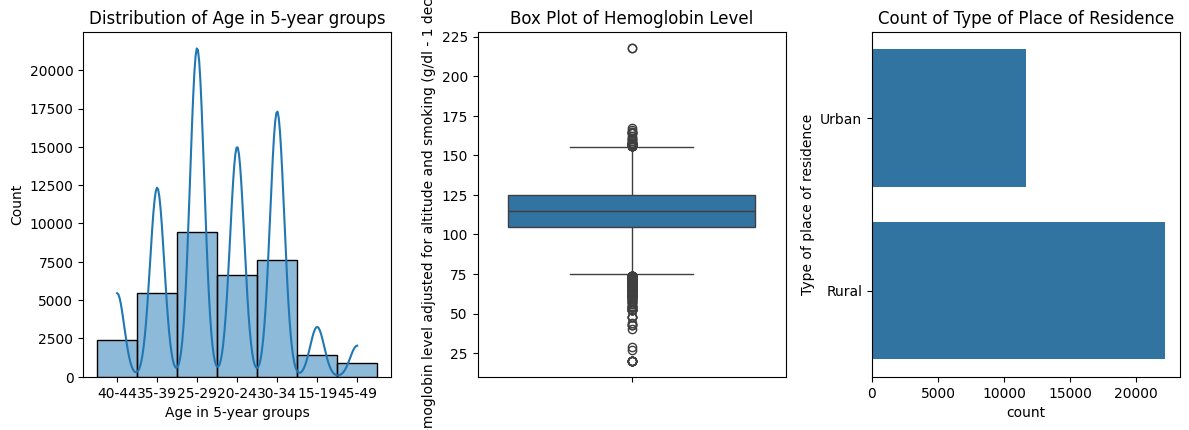

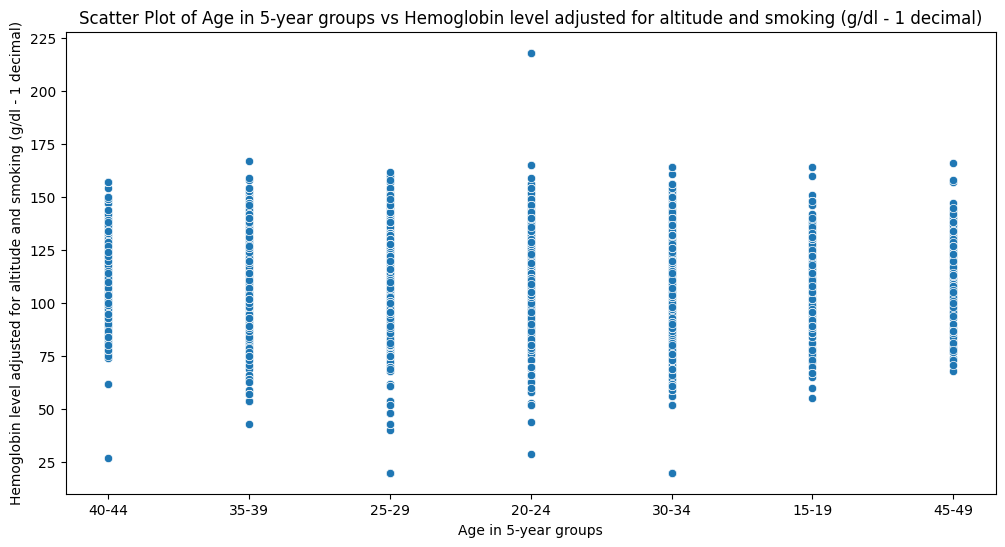

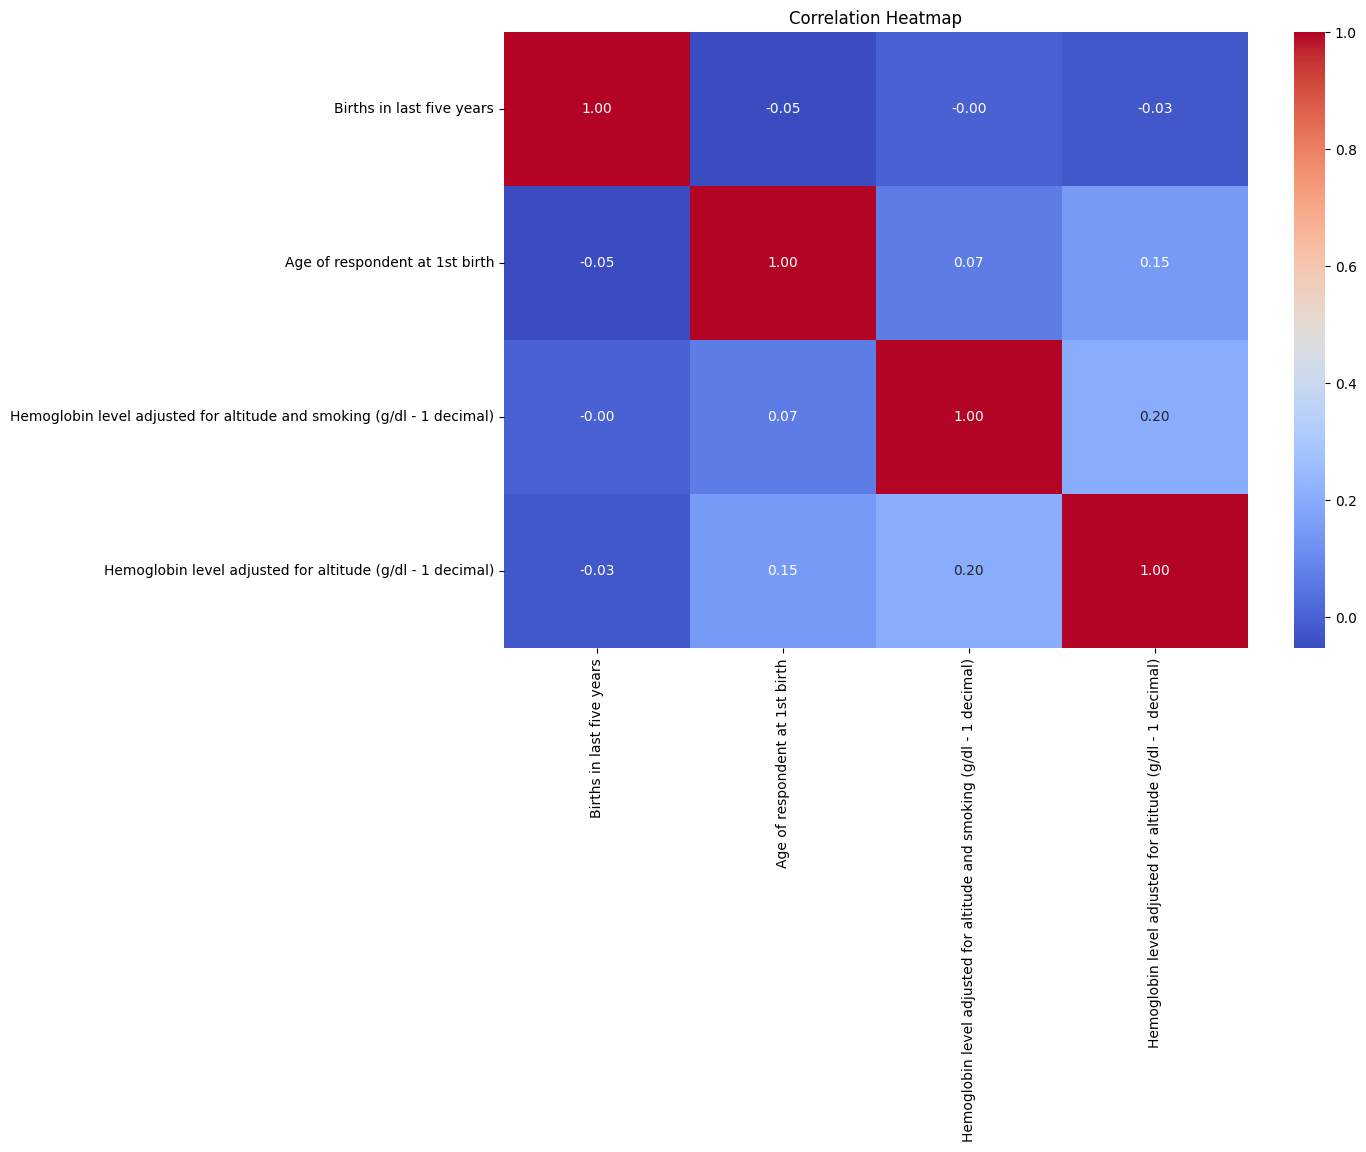

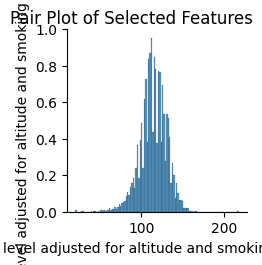


Distribution of numerical columns:


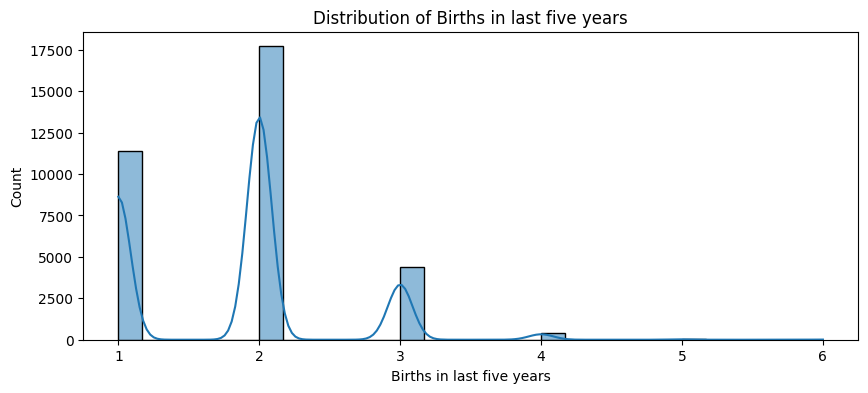

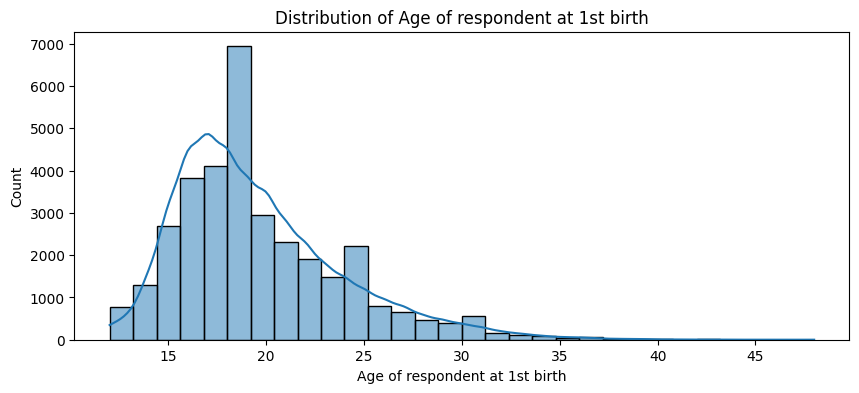

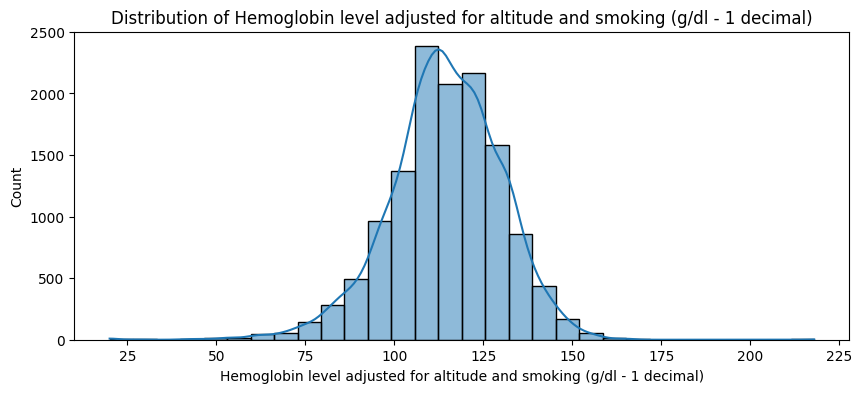

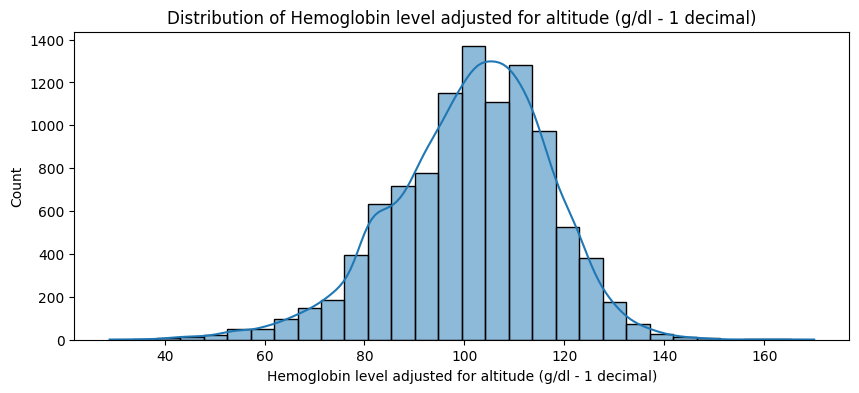

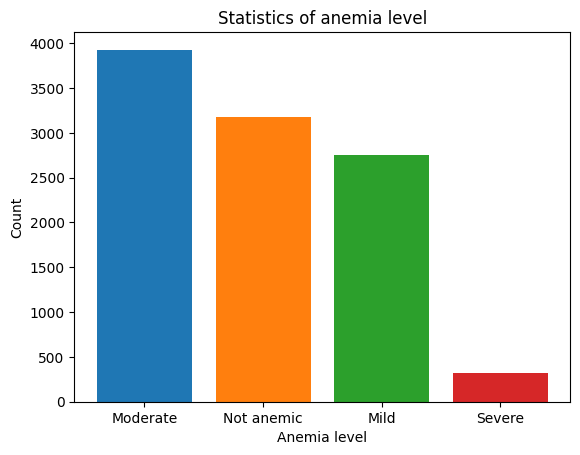

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
print("\033[1m\033[97m5. Exploratory Data Analysis (EDA):\033[0m")

df = pd.read_csv('children_anemia.csv')

# Print column names to check for discrepancies
print("Columns in DataFrame:", df.columns)

# Univariate Analysis
plt.figure(figsize=(12, 8))

# Example with adjusted column names
# 1. Histogram for Numerical Feature: 'Age in 5-year groups'
plt.subplot(2, 3, 1)
sns.histplot(df['Age in 5-year groups'].dropna(), kde=True, bins=30)
plt.title('Distribution of Age in 5-year groups')

# 2. Box Plot for Numerical Feature: 'Hemoglobin Level'
# Adjusted column name
plt.subplot(2, 3, 2)
sns.boxplot(y=df['Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)'])
plt.title('Box Plot of Hemoglobin Level')

# 3. Bar Plot for Categorical Feature: 'Type of place of residence'
plt.subplot(2, 3, 3)
sns.countplot(y=df['Type of place of residence'])
plt.title('Count of Type of Place of Residence')

# Adjust layout
plt.tight_layout()
plt.show()

# Bivariate Analysis

# 1. Scatter Plot for Relationship between 'Age in 5-year groups' and 'Hemoglobin Level'
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df['Age in 5-year groups'], y=df['Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)'])  # Adjusted column name
plt.title('Scatter Plot of Age in 5-year groups vs Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)')
plt.xlabel('Age in 5-year groups')
plt.ylabel('Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)')
plt.show()

# 2. Heatmap for Correlation Matrix
correlation_matrix = df.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# 3. Pair Plot for Multiple Features
features_to_plot = ['Age in 5-year groups', 'Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)', 'Wealth index combined']  # Adjusted column names
sns.pairplot(df[features_to_plot])
plt.suptitle('Pair Plot of Selected Features', y=1.02)
plt.show()



# Distribution of numerical columns
numerical_columns = df.select_dtypes(include=[np.number]).columns
print("\nDistribution of numerical columns:")
for column in numerical_columns:
    plt.figure(figsize=(10, 4))
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
    plt.show()
# Selecting only numerical columns
numerical_df = df.select_dtypes(include=[np.number])


plt.bar(df["Anemia level.1"].value_counts().index,df["Anemia level.1"].value_counts().values, color=['tab:blue', 'tab:orange', 'tab:green', 'tab:red'])
plt.title(f'Statistics of anemia level')
plt.xlabel('Anemia level')
plt.ylabel('Count')

plt.show()




#6.Outlier Detection and Handling:

#Outlier Detection :
Outliers can be identified using statistical methods such as Z-Score and In-
terquartile Range (IQR). Here, both methods are applied to numerical columns
in the dataset to detect and visualize outliers.

#Z-Score Method :
The Z-Score method calculates the standard score of a data point relative to
the mean and standard deviation of the dataset.

#IQR Method :
The Interquartile Range (IQR) method identifies outliers as data points that
fall below 1.5 times the IQR from the first quartile or above 1.5 times the IQR
from the third quartile.

6. Outlier Detection and Handling:

Finding outliers for column: Births in last five years
Number of outliers (Z-Score Method) in Births in last five years: 474
Number of outliers (IQR Method) in Births in last five years: 474


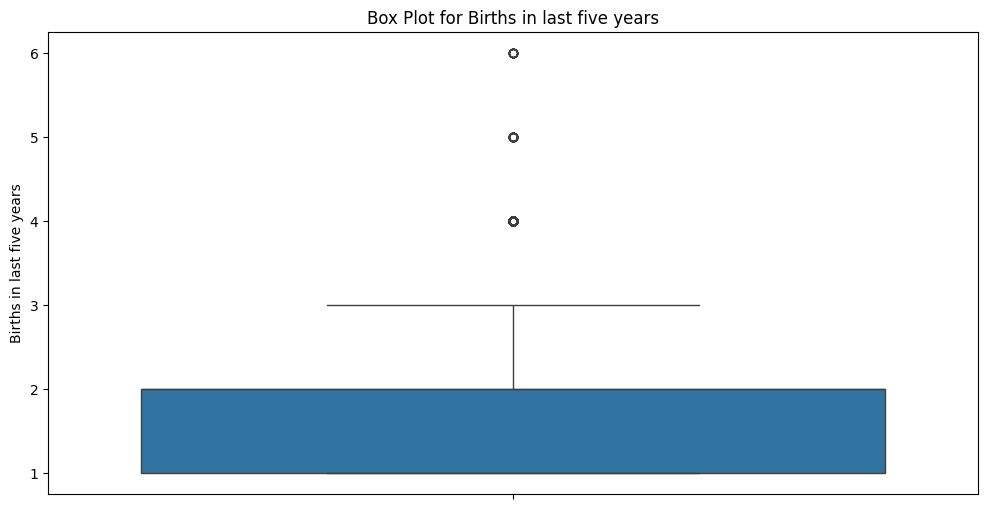


Finding outliers for column: Age of respondent at 1st birth
Number of outliers (Z-Score Method) in Age of respondent at 1st birth: 377
Number of outliers (IQR Method) in Age of respondent at 1st birth: 539


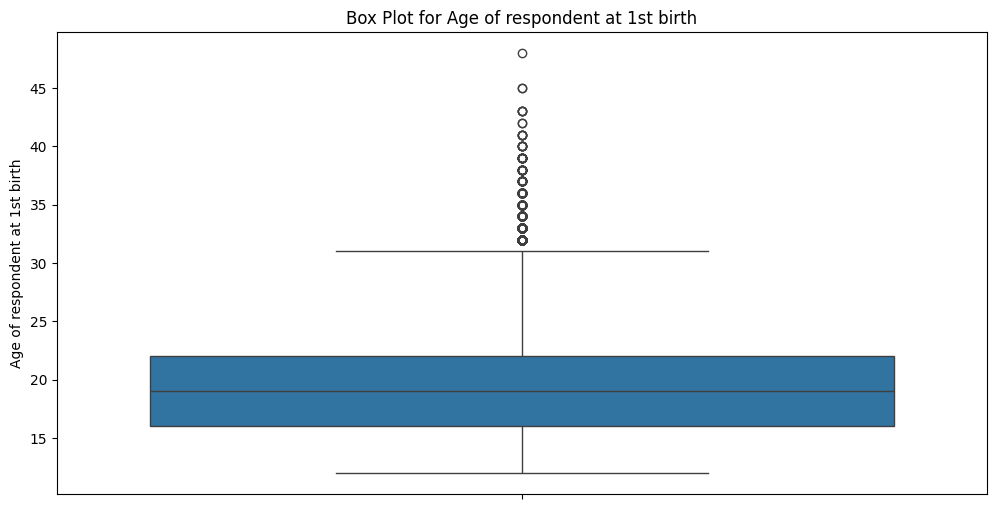


Finding outliers for column: Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)
Number of outliers (Z-Score Method) in Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal): 97
Number of outliers (IQR Method) in Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal): 211


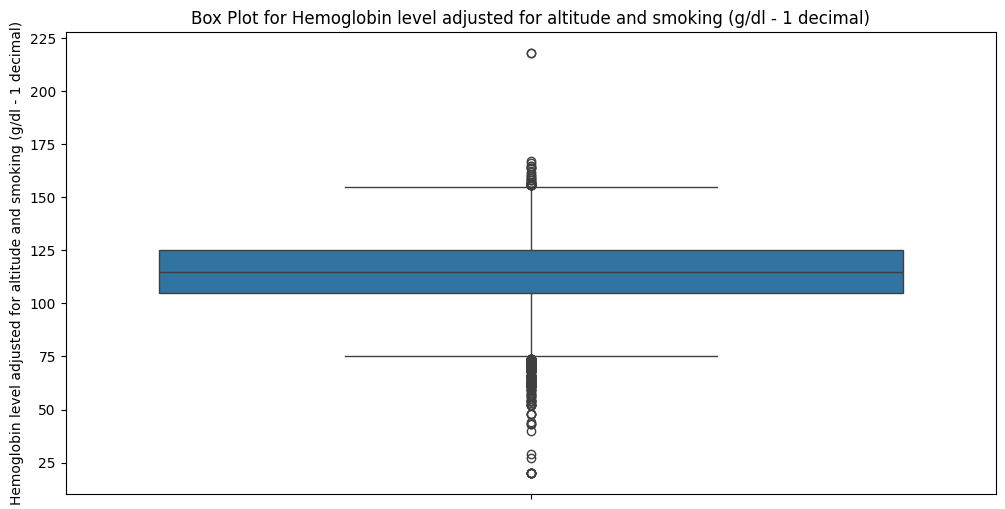


Finding outliers for column: Hemoglobin level adjusted for altitude (g/dl - 1 decimal)
Number of outliers (Z-Score Method) in Hemoglobin level adjusted for altitude (g/dl - 1 decimal): 77
Number of outliers (IQR Method) in Hemoglobin level adjusted for altitude (g/dl - 1 decimal): 166


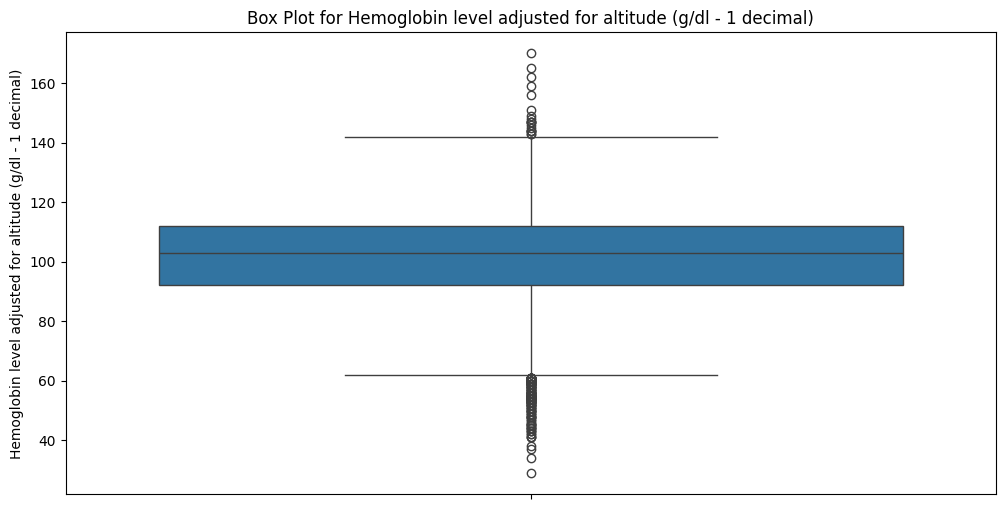

Column 'Hemoglobin level' not found in DataFrame.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load the dataset
print("\033[1m\033[97m6. Outlier Detection and Handling:\033[0m")

df = pd.read_csv('children_anemia.csv')

# Define a function to find outliers using Z-Score
def find_outliers_z_score(df, column):
    # Drop NA values before calculating Z-scores
    df_dropna = df.dropna(subset=[column])
    z_scores = np.abs(stats.zscore(df_dropna[column]))
    # Use boolean indexing on the DataFrame without NA values
    return df_dropna[z_scores > 3]  # Typically, a Z-score greater than 3 is considered an outlier

# Define a function to find outliers using IQR
def find_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# List of numerical columns to check for outliers
numerical_columns = df.select_dtypes(include=[np.number]).columns

# Find and print outliers for each numerical column
for column in numerical_columns:
    print(f"\nFinding outliers for column: {column}")

    # Z-Score Method
    outliers_z = find_outliers_z_score(df, column)
    print(f"Number of outliers (Z-Score Method) in {column}: {len(outliers_z)}")

    # IQR Method
    outliers_iqr = find_outliers_iqr(df, column)
    print(f"Number of outliers (IQR Method) in {column}: {len(outliers_iqr)}")

    # Plotting
    plt.figure(figsize=(12, 6))
    sns.boxplot(df[column])
    plt.title(f'Box Plot for {column}')
    plt.show()

# Example for a specific column
specific_column = 'Hemoglobin level'  # Replace with your column name
if specific_column in df.columns:
    outliers_z = find_outliers_z_score(df, specific_column)
    print(f"\nOutliers in {specific_column} (Z-Score Method):")
    print(outliers_z)

    outliers_iqr = find_outliers_iqr(df, specific_column)
    print(f"Outliers in {specific_column} (IQR Method):")
    print(outliers_iqr)

    # Plotting for specific column
    plt.figure(figsize=(12, 6))
    sns.boxplot(df[specific_column])
    plt.title(f'Box Plot for {specific_column}')
    plt.show()
else:
    print(f"Column '{specific_column}' not found in DataFrame.")



# **Outliers that are removed from Code**

The code uses the Interquartile Range (IQR) method to remove outliers from the 'Births in last five years' column, ensuring cleaner and more reliable data. It calculates the 25th (Q1) and 75th (Q3) percentiles to find the IQR, which measures the spread of the middle 50% of the data. Outliers are identified as values outside the range of
𝑄
1
−
1.5
×
IQR
Q1−1.5×IQR and
𝑄
3
+
1.5
×
IQR
Q3+1.5×IQR, and these values are filtered out.


# **Why They Are Removed**

By removing outliers, the code ensures that statistical measures like the mean and standard deviation more accurately reflect the typical values in the dataset. Outliers can distort these metrics, making them unrepresentative of the general data trend. By filtering out extreme values, the analysis provides a clearer and more accurate depiction of the data’s central tendency and spread, focusing on the main patterns and trends.





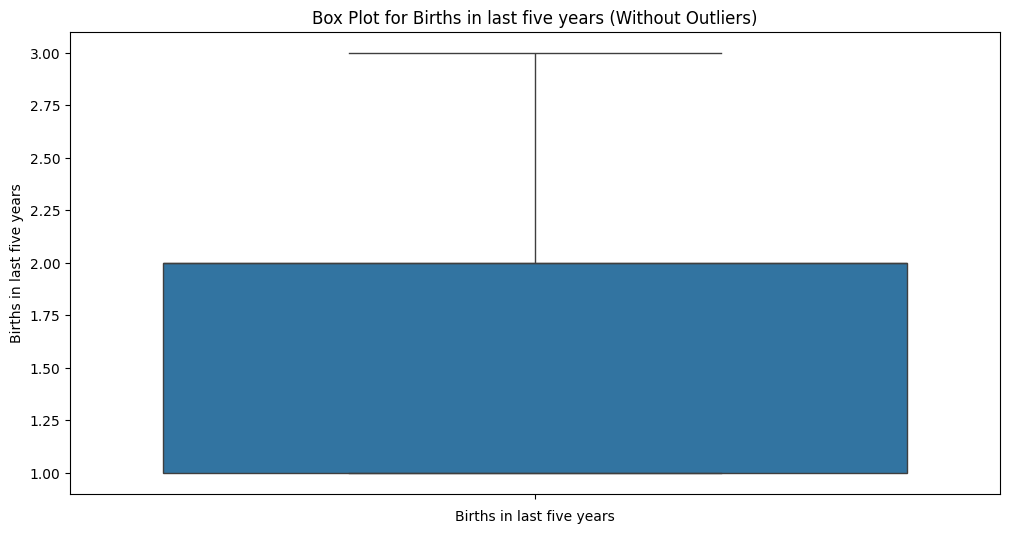

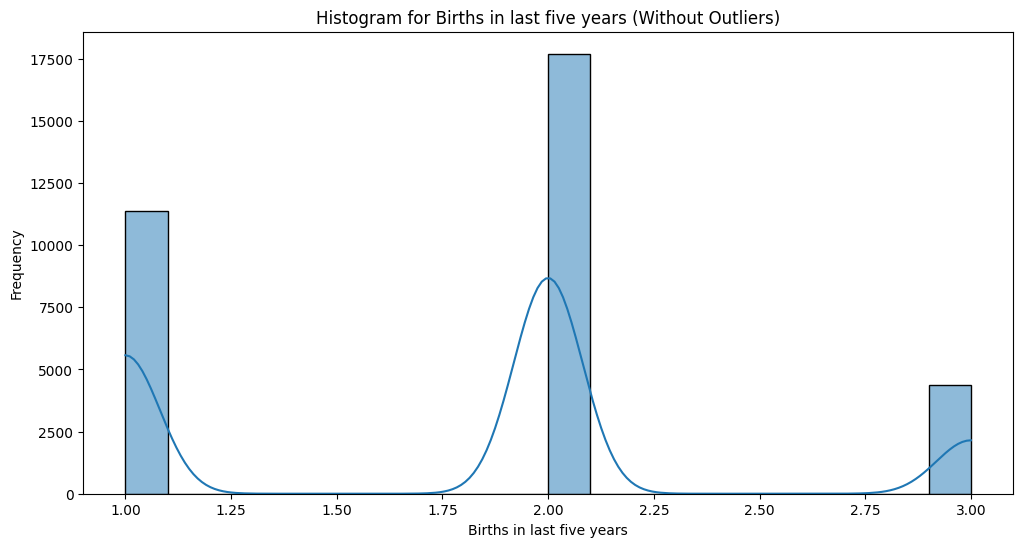

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load the dataset
df = pd.read_csv('children_anemia.csv')

# Function to remove outliers using the IQR method
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Filter the DataFrame to keep only non-outliers
    df_cleaned = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_cleaned

# Column name for analysis
column_name = 'Births in last five years'

# Remove outliers from the 'Births in last five yaears' column
df_cleaned = remove_outliers_iqr(df, column_name)

# Plotting the cleaned data

# Box Plot
plt.figure(figsize=(12, 6))
sns.boxplot(df_cleaned[column_name])
plt.title(f'Box Plot for {column_name} (Without Outliers)')
plt.xlabel(column_name)
plt.show()

# Histogram
plt.figure(figsize=(12, 6))
sns.histplot(df_cleaned[column_name], bins=20, kde=True)
plt.title(f'Histogram for {column_name} (Without Outliers)')
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.show()


# 7.Data Visualization:

Visualizations help in understanding the distributions and relationships within
the data. Histograms, box plots, bar plots, scatter plots, and pair plots are used in this analysis.

exploratory data analysis (EDA) steps on a dataset related to anemia in children. It starts by loading the dataset and then proceeds to feature engineering, where new features such as AgeCategory, HemoglobinDifference, BirthsInterval, WealthEducationInteraction, and SmokingAnemia are created to capture additional insights from the data.

This visualizes the distributions of key numerical features using histograms, revealing that hemoglobin levels have a slightly right-skewed normal distribution, while age categories are evenly distributed, and birth intervals vary across respondents. Box plots are used to identify outliers in these numerical features, indicating the presence of outliers in hemoglobin levels and birth intervals.




7. Data Visualization:


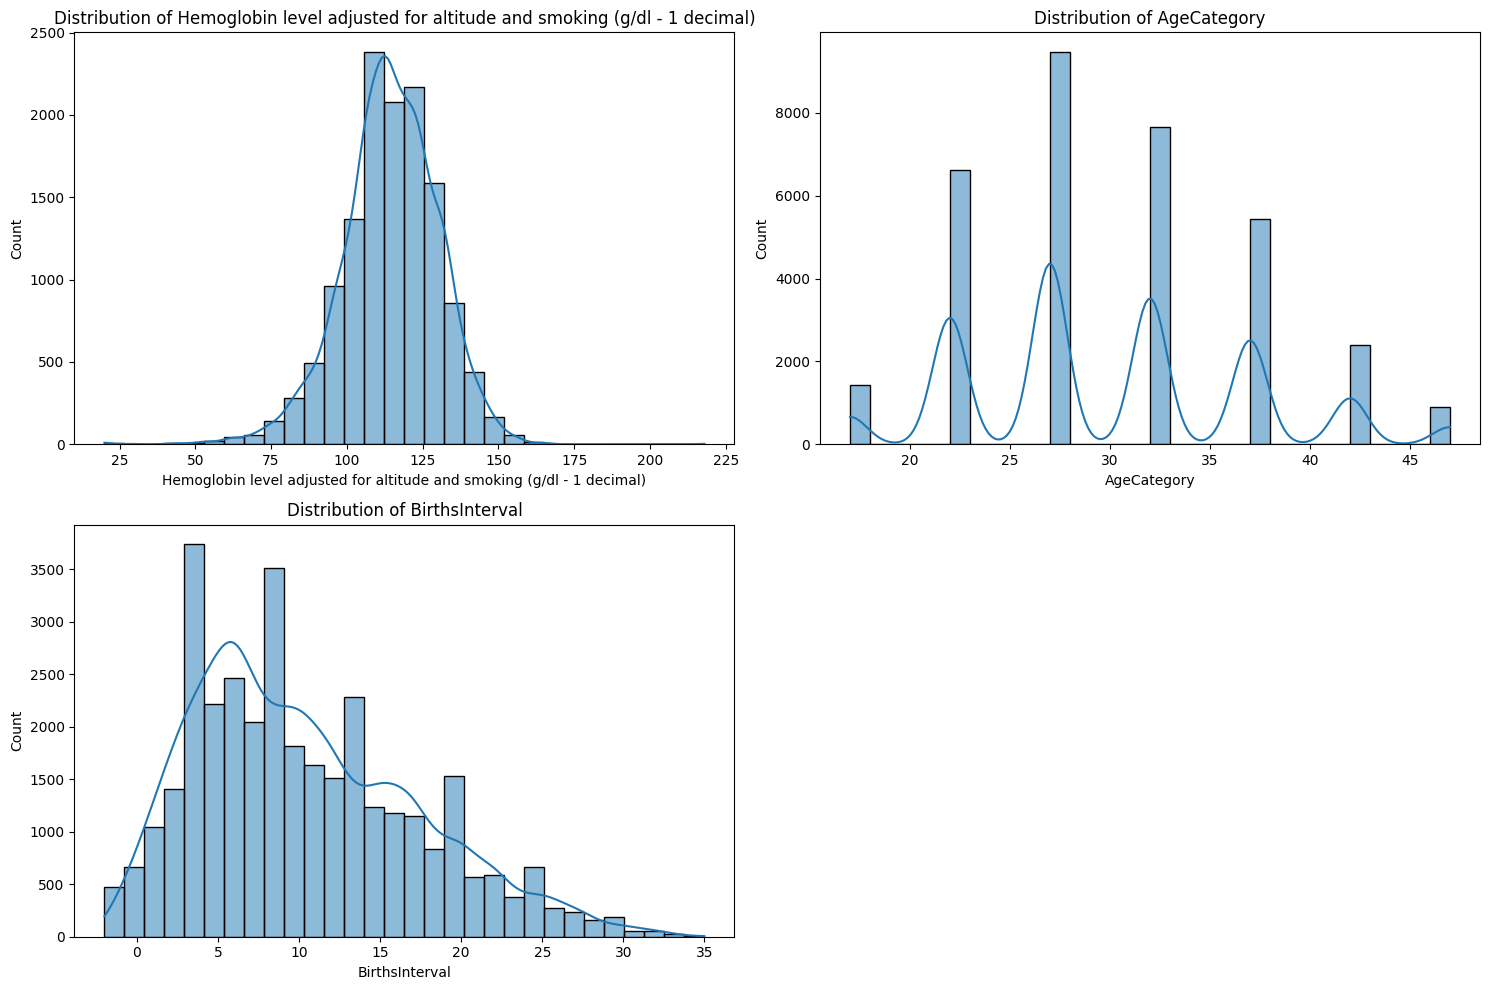

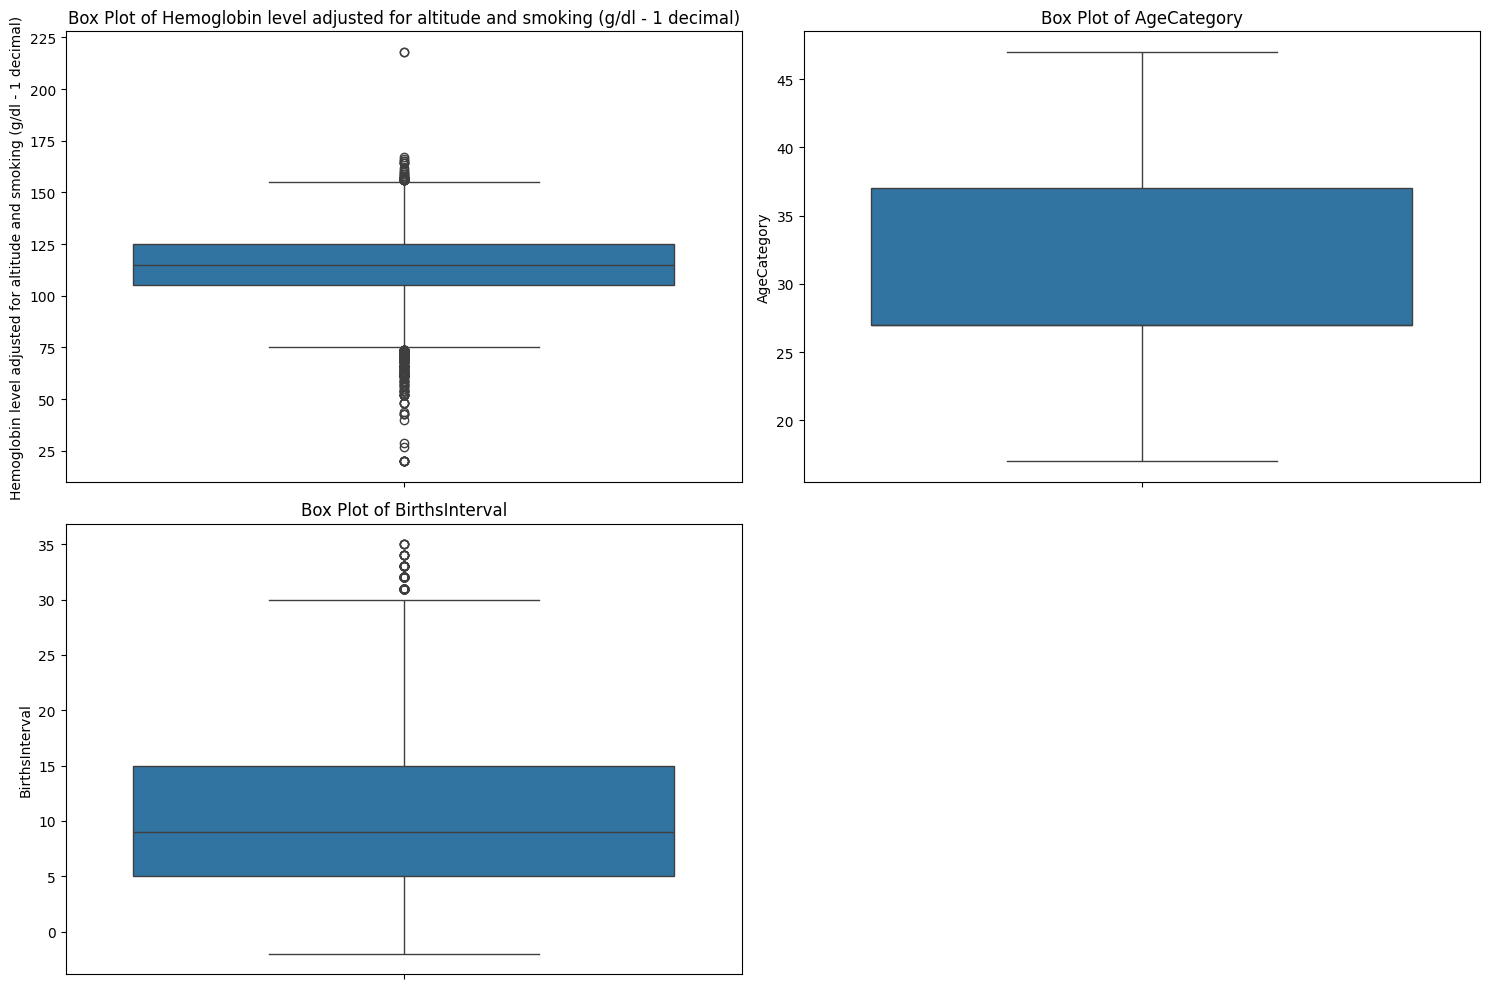

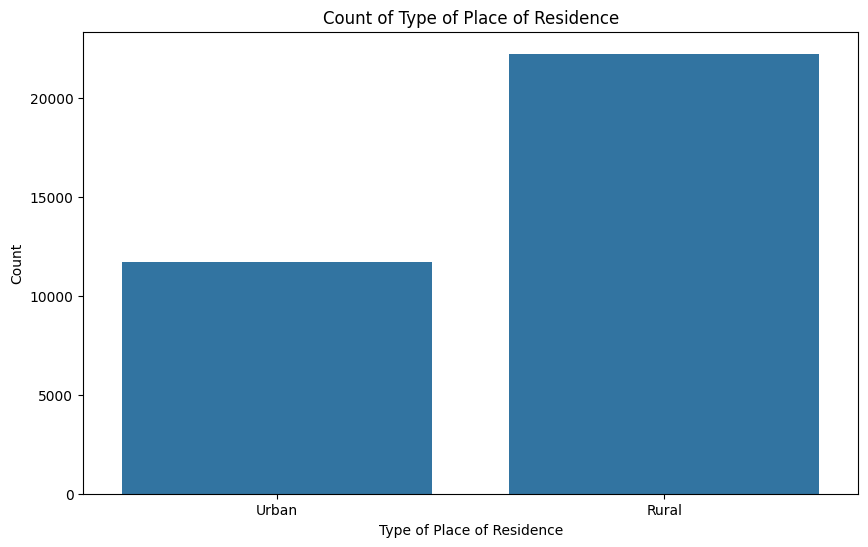

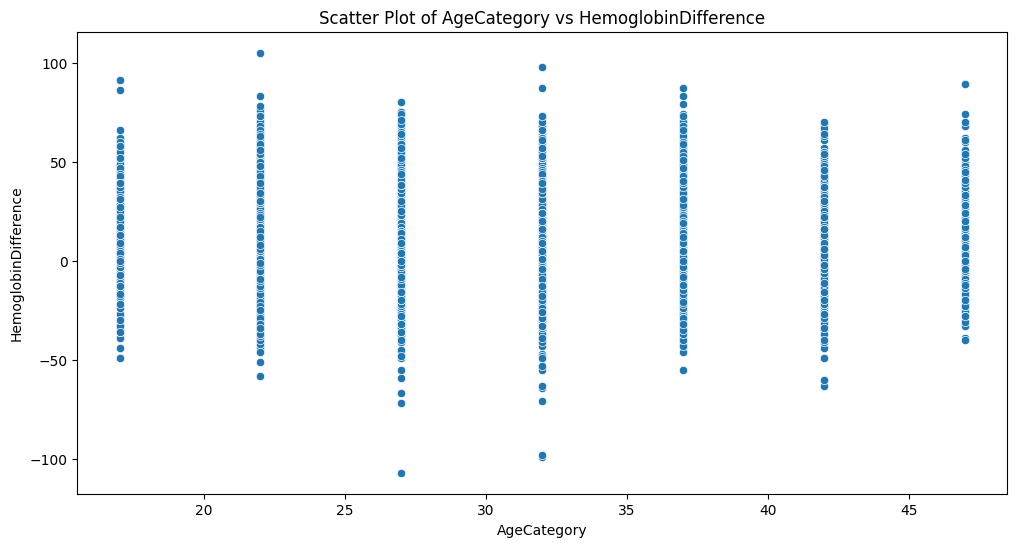

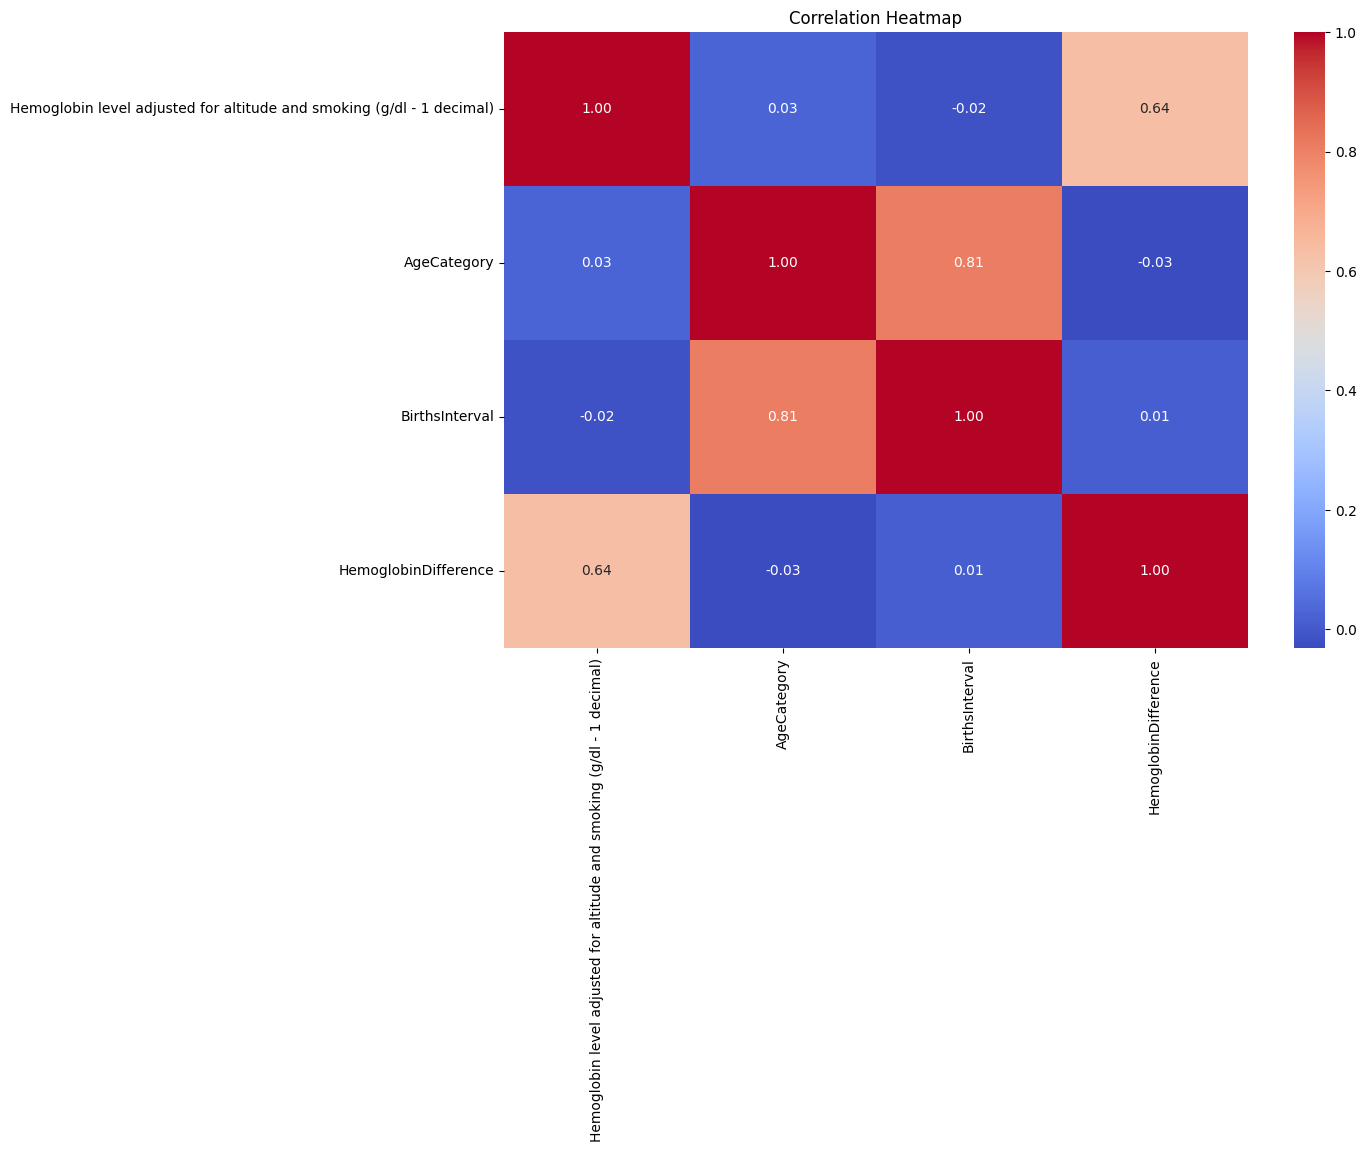

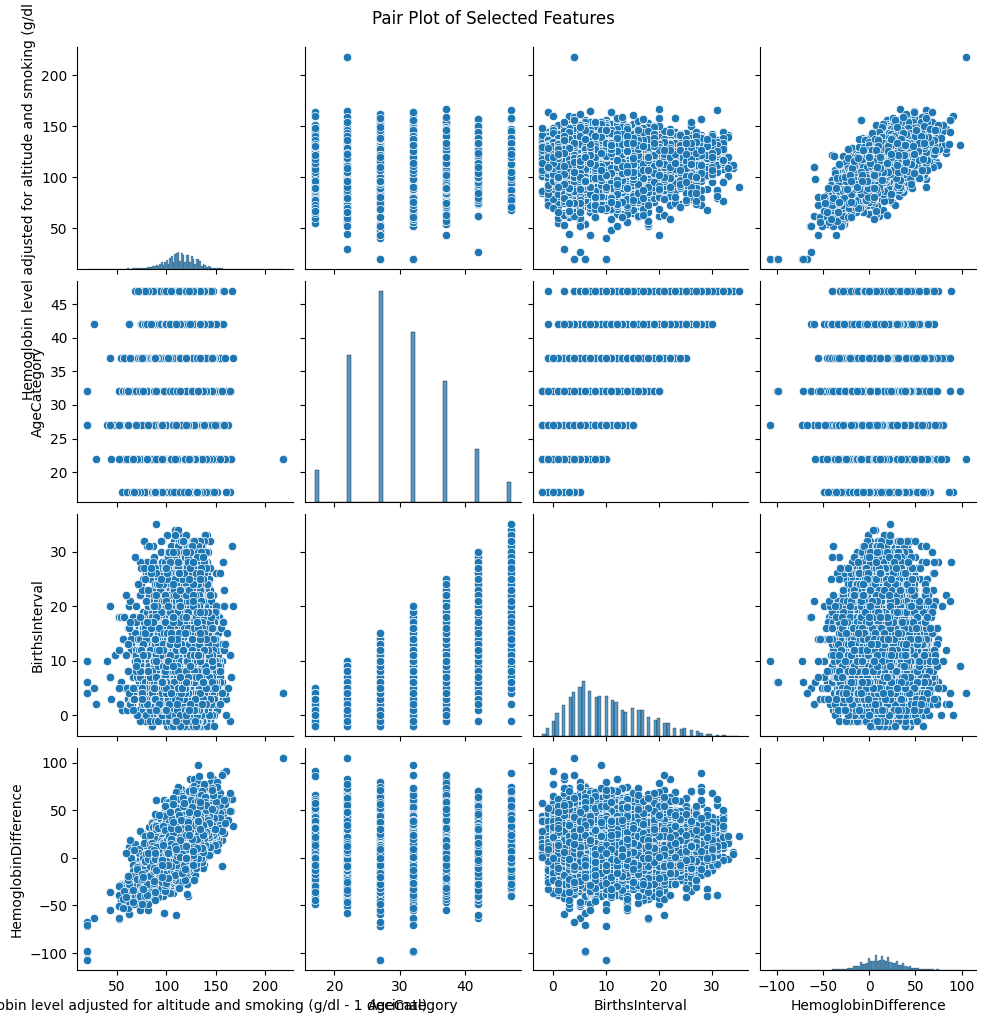

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('children_anemia.csv')
print("\033[1m\033[97m7. Data Visualization:\033[0m")

# Feature Engineering
def convert_age_range(age_range):
    if pd.isna(age_range):
        return np.nan
    age_range = age_range.split('-')
    if len(age_range) == 2:
        return (int(age_range[0]) + int(age_range[1])) / 2
    else:
        return np.nan

df['AgeCategory'] = df['Age in 5-year groups'].apply(convert_age_range)
df['HemoglobinDifference'] = df['Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)'] - df['Hemoglobin level adjusted for altitude (g/dl - 1 decimal)']
df['BirthsInterval'] = df['AgeCategory'] - df['Age of respondent at 1st birth']
df['WealthEducationInteraction'] = df['Wealth index combined'] + "_" + df['Highest educational level']
df['SmokingAnemia'] = np.where((df['Smokes cigarettes'] == 'Yes') & (df['Anemia level'] == 'Moderate'), 1, 0)

# Visualization: Histograms for Numerical Features
plt.figure(figsize=(15, 10))

numerical_features = ['Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)', 'AgeCategory', 'BirthsInterval']

for i, feature in enumerate(numerical_features):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[feature].dropna(), kde=True, bins=30)
    plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

# Insights:
# - Hemoglobin levels show a normal distribution with a slight right skew.
# - Age categories seem to be evenly distributed across the dataset.
# - Birth intervals show variability, indicating a mix of birth spacing among respondents.
# Visualization: Box Plots for Numerical Features to Identify Outliers
plt.figure(figsize=(15, 10))

for i, feature in enumerate(numerical_features):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(y=df[feature])
    plt.title(f'Box Plot of {feature}')

plt.tight_layout()
plt.show()

# Insights:
# - Outliers are present in hemoglobin levels and birth intervals.
# - Age categories do not show significant outliers.
# Visualization: Bar Plot for Categorical Feature 'Type of place of residence'
plt.figure(figsize=(10, 6))
sns.countplot(x=df['Type of place of residence'])
plt.title('Count of Type of Place of Residence')
plt.xlabel('Type of Place of Residence')
plt.ylabel('Count')
plt.show()

# Insights:
# - There are more respondents from rural areas compared to urban areas.
# Visualization: Scatter Plot for Bivariate Analysis between 'AgeCategory' and 'HemoglobinDifference'
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df['AgeCategory'], y=df['HemoglobinDifference'])
plt.title('Scatter Plot of AgeCategory vs HemoglobinDifference')
plt.xlabel('AgeCategory')
plt.ylabel('HemoglobinDifference')
plt.show()

# Insights:
# Visualization: Correlation Heatmap for Numerical Features

correlation_matrix = df[['Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)',
                         'AgeCategory', 'BirthsInterval', 'HemoglobinDifference']].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Insights:
# - Hemoglobin levels and hemoglobin differences are highly correlated, as expected.
# - Age category and birth intervals show a moderate positive correlation, indicating older respondents tend to have longer birth intervals.

# Visualization: Pair Plot for Multiple Features
sns.pairplot(df[['Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)',
                 'AgeCategory', 'BirthsInterval', 'HemoglobinDifference']])
plt.suptitle('Pair Plot of Selected Features', y=1.02)
plt.show()


#8. Correlation Analysis:
Correlation analysis on a dataset related to children's anemia. It starts by engineering key features such as AgeCategory, HemoglobinDifference, and BirthsInterval to enhance the dataset's informative value. The code then selects numerical features, including hemoglobin levels, age categories, birth intervals, and hemoglobin differences, to compute a correlation matrix. This matrix quantifies the linear relationships between these variables. The results are visualized using a heatmap, which offers a clear view of how strongly these features are correlated.

The matrix helps identify moderate positive correlations, such as between age category and birth intervals, indicating that older respondents may have longer birth intervals.

8. Correlation Analysis:


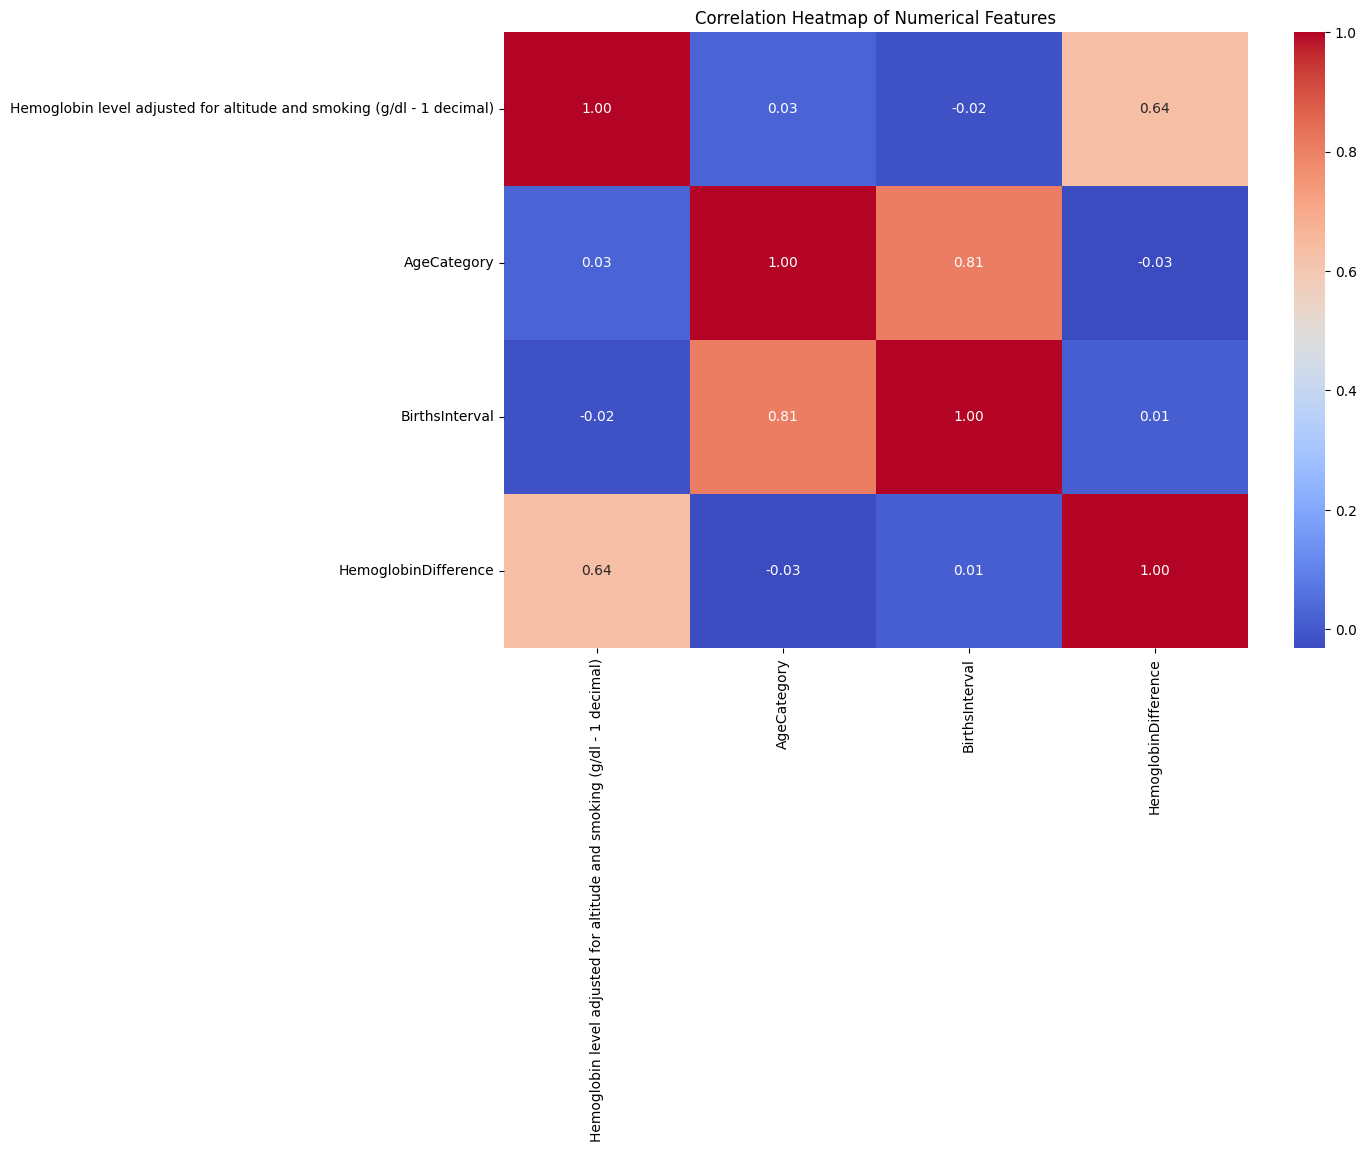

Correlation Matrix:
                                                    Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)  \
Hemoglobin level adjusted for altitude and smok...                                           1.000000                       
AgeCategory                                                                                  0.026586                       
BirthsInterval                                                                              -0.015655                       
HemoglobinDifference                                                                         0.636944                       

                                                    AgeCategory  \
Hemoglobin level adjusted for altitude and smok...     0.026586   
AgeCategory                                            1.000000   
BirthsInterval                                         0.807348   
HemoglobinDifference                                  -0.031553   

                  

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
print("\033[1m\033[97m8. Correlation Analysis:\033[0m")

df = pd.read_csv('children_anemia.csv')

# Feature Engineering
def convert_age_range(age_range):
    if pd.isna(age_range):
        return np.nan
    age_range = age_range.split('-')
    if len(age_range) == 2:
        return (int(age_range[0]) + int(age_range[1])) / 2
    else:
        return np.nan

df['AgeCategory'] = df['Age in 5-year groups'].apply(convert_age_range)
df['HemoglobinDifference'] = df['Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)'] - df['Hemoglobin level adjusted for altitude (g/dl - 1 decimal)']
df['BirthsInterval'] = df['AgeCategory'] - df['Age of respondent at 1st birth']

# Selecting numerical features
numerical_features = ['Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)',
                      'AgeCategory', 'BirthsInterval', 'HemoglobinDifference']

# Calculate correlation matrix
correlation_matrix = df[numerical_features].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)


#9.Summary and Insights

• Outliers: Outlier detection revealed that several numerical columns, in-
cluding hemoglobin levels and birth intervals, contained significant out-
liers. These outliers were identified using both the Z-Score and IQR meth-
ods.

• Feature Distributions: The distribution of hemoglobin levels appears to
be approximately normal but with a slight right skew. Age categories were
evenly distributed, and the birth interval showed variability, indicating
different birth spacing patterns among respondents.

• Feature Engineering: New features such as AgeCategory, Hemoglobin-
Difference, and WealthEducationInteraction were created to capture ad-
ditional relationships within the data. These features can potentially en-
hance model performance by providing more nuanced information.

• Correlation Analysis: The correlation analysis showed a strong positive
correlation between hemoglobin levels and hemoglobin differences, which
is expected. However, most other numerical features exhibited weak cor-
relations with each other, suggesting that a more complex model might
be needed to capture the underlying patterns in the data.

• Data Imbalance: The analysis of categorical variables, such as the type
of place of residence, showed an imbalance, with more respondents from
rural areas compared to urban areas. This imbalance should be considered
in the modeling process to avoid biased predictions.


#Model Building
The findings from the data preprocessing and EDA will directly influence the
approach to building a machine learning model:

• Outlier Handling: Decisions regarding the treatment of outliers need
to be made carefully. Depending on the model chosen, outliers might be
retained, removed, or treated with robust methods such as transformation
or weighting.

• Feature Selection: The new features created during the feature engi-
neering process will be included in the initial model training. However,
feature importance will need to be evaluated to ensure that only the most
relevant features are retained.